# Data Preprocessing

### Loading NeMo

In [ ]:
# Install NeMo library. If you are running locally (rather than on Google Colab), comment out the below lines
# and instead follow the instructions at https://github.com/NVIDIA/NeMo#Installation
BRANCH = 'main'
# BRANCH = 'r2.0.0rc1'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]

DEPRECATION: git+https://github.com/NVIDIA/NeMo.git@main#egg=nemo_toolkit[all] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://github.com/NVIDIA/NeMo.git (to revision main) to /tmp/pip-install-tnweeig_/nemo-toolkit_3d0b1b617e22475e95a111350516e1d0
  Running command git clone --filter=blob:none --quiet https://github.com/NVIDIA/NeMo.git /tmp/pip-install-tnweeig_/nemo-toolkit_3d0b1b617e22475e95a111350516e1d0
  Resolved https://github.com/NVIDIA/NeMo.git to commit 6a78ab8cf0c67f4d704a245e2b4243dfd968019b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━

In [ ]:
# Download local version of NeMo scripts. If you are running locally and want to use your own local NeMo code,
# comment out the below lines and set NEMO_DIR to your local path.
NEMO_DIR = 'nemo'
!git clone https://github.com/NVIDIA/NeMo.git $NEMO_DIR

Cloning into 'nemo'...
remote: Enumerating objects: 240845, done.
remote: Counting objects: 100% (1182/1182), done.
remote: Compressing objects: 100% (482/482), done.
remote: Total 240845 (delta 938), reused 700 (delta 700), pack-reused 239663 (from 3)
Receiving objects: 100% (240845/240845), 452.09 MiB | 16.28 MiB/s, done.
Resolving deltas: 100% (180762/180762), done.
Updating files: 100% (4215/4215), done.


In [ ]:
!git clone https://github.com/nipponjo/tts-arabic-pytorch.git

Cloning into 'tts-arabic-pytorch'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 337 (delta 56), reused 48 (delta 48), pack-reused 266 (from 2)
Receiving objects: 100% (337/337), 3.32 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset and saving the audio files to a separate directory

In [ ]:
!pip install datasets librosa

In [ ]:
!pip install numpy --upgrade --ignore-installed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 65.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
unstructured 0.14.9 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.5 which is incompatible.
tritonclient 2.51.0 requires numpy<2,>=1.19.1, but you have numpy 2.2.5 which is incompatible.
nvidia-pytriton 0.5.14 requires numpy<2.0.0,>=1.21, but you have numpy 2.2.5 which is incompatible.
nemo-toolkit 2.4.0rc0 requires numpy<2.0.0,>=1.22, but you have numpy 2.2.5 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is 

In [ ]:
!sudo rm -rf /content/MBZUAI_ClArTTS_data_preprocessed

In [ ]:
import os
import json
import numpy as np
from datasets import load_dataset, DatasetDict

# Load the ClArTTS dataset
clar_dataset = load_dataset("MBZUAI/ClArTTS")

# Specify where to save the .wav files (inside Google Colab)
audio_output_dir = "/content/MBZUAI_ClArTTS_audio"
os.makedirs(audio_output_dir, exist_ok=True)

# Specify the output JSON file path
# json_file_path = "/content/training_metadata.json"


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
clar_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'file', 'audio', 'sampling_rate', 'duration'],
        num_rows: 9500
    })
    test: Dataset({
        features: ['text', 'file', 'audio', 'sampling_rate', 'duration'],
        num_rows: 205
    })
})

In [ ]:
# Define the split ratio
split_ratio = 0.2  # 20% validation

# Perform the split
train_val_split = clar_dataset["train"].train_test_split(test_size=split_ratio, shuffle=False)

# Rename the split keys
clar_dataset_split = DatasetDict({
    "train": train_val_split["train"],
    "validation": train_val_split["test"],  # Renaming "test" to "validation"
    "test": clar_dataset["test"]
})

# Print dataset details after splitting
print(clar_dataset_split)


DatasetDict({
    train: Dataset({
        features: ['text', 'file', 'audio', 'sampling_rate', 'duration'],
        num_rows: 7600
    })
    validation: Dataset({
        features: ['text', 'file', 'audio', 'sampling_rate', 'duration'],
        num_rows: 1900
    })
    test: Dataset({
        features: ['text', 'file', 'audio', 'sampling_rate', 'duration'],
        num_rows: 205
    })
})


In [ ]:
import scipy.io.wavfile as wavfile

In [ ]:
# Initialize a list to store the metadata
metadata = []

# Process each record in the dataset (you can change the split to 'train', 'test', etc. if needed)
for row in clar_dataset['train']:  # Replace 'train' with the relevant split if necessary
    file_name = row['file']  # Name of the audio file (without extension)
    text = row['text']       # Transcription
    audio = np.array(row['audio'])  # Convert audio to NumPy array
    sampling_rate = row['sampling_rate']  # Sampling rate
    duration = row['duration']  # Duration of the audio

    # Create the full file path for the .wav file
    wav_file_path = os.path.join(audio_output_dir, f"{file_name}")

    # Save the audio array as a .wav file
    wavfile.write(wav_file_path, sampling_rate, audio)

    # Add the metadata for this entry to the list
    metadata.append({
        'audio_file': f"{file_name}",
        'text': text,
        'duration': duration
    })

# Write the metadata to a JSON file
with open(json_file_path, mode='w', encoding='utf-8') as json_file:
    json.dump(metadata, json_file, ensure_ascii=False, indent=4)

print("Audio files and JSON successfully created!")

Audio files and JSON successfully created!


In [ ]:
import sys
sys.path.append('tts-arabic-pytorch/text/')  # Add the script's directory to Python path
from phonetise_buckwalter import (
    arabic_to_buckwalter,
    buckwalter_to_arabic,
    process_utterance
)

def ar2buck2phones(text, return_phonemes=True):
    # Step 1: Convert remaining Arabic to Buckwalter
    bw_text = arabic_to_buckwalter(text)

    # Step 2: Cleanup (optional)
    # bw_text = bw_text.replace("~", "")  # Remove tashkeel marks if unwanted

    if return_phonemes:
        # Step 3: Convert to phonemes if requested
        return bw_text, process_utterance(bw_text).replace("+ ", "")
    return bw_text

# Example usage:

text = ":وَقِيلَ لِمُعَاوِيَةَ أَيُّمَا أَحَبُّ إلَيْك؟ .قَالَ: صَدِيقٌ يُحَبِّبُنِي إلَى النَّاسِ"
# Get Buckwalter (original functionality)
text_buckwalter , text_phonemes = ar2buck2phones(text)
print("\nBuckwalter text sample:")
print(text_buckwalter)
print("\nPhonemes sample:")
print(text_phonemes)


Buckwalter text sample:
:waqiyla limuEaAwiyapa >ayu~maA >aHabu~ <layok؟ .qaAla: SadiyqN yuHabi~buniy <laY Alna~Asi

Phonemes sample:
w A q II0 l a l i0 m u0 E aa w i0 y a t a < a yy u0 m aa < a H a bb u0 < i0 l a y k q AA l a S A d ii0 q U1 n y u0 H a bb i0 b u0 n ii0 < i0 l aa nn aa s i0


In [ ]:
# # import librosa
# sr, _ = wavfile.read(wav_file_path)
# sr

22050

In [ ]:
# !sudo rm -rf /content/MBZUAI_ClArTTS_audio
!mkdir /content/MBZUAI_ClArTTS_audio

In [ ]:
from pathlib import Path
from tqdm import tqdm
import os
import json
import numpy as np
# from scipy.io import wavfile

train_manifest_path = Path("/content/train_manifest.json")
val_manifest_path = Path("/content/val_manifest.json")

# Write the training entries to the manifest
with open(train_manifest_path, 'w', encoding='utf-8') as f:
    for row in tqdm(clar_dataset_split['train'], desc="Processing training data"):
        file_name = row['file']
        text = row['text']
        _, text_phonemes = ar2buck2phones(text)
        audio = np.array(row['audio'])
        sampling_rate = row['sampling_rate']  # Sampling rate
        duration = row['duration']
        # calculated_duration = len(audio) / sampling_rate
        # if duration != calculated_duration :
        #   print(f"Duration is not correct for example {file_name}\n")
        #   print(f"Duration is {duration}, must be {calculated_duration}\n")

        wav_file_path = os.path.join(audio_output_dir, f"{file_name}")
        wavfile.write(wav_file_path, sampling_rate, audio)

        entry = {
            "audio_filepath": wav_file_path,
            "ar_text": text,
            "text": text_phonemes,
            "duration": duration
        }
        f.write(json.dumps(entry, ensure_ascii=False) + '\n')

print(f"Training input manifest created at: {train_manifest_path}")

# Write the validation entries to the manifest
with open(val_manifest_path, 'w', encoding='utf-8') as f:
    for row in tqdm(clar_dataset_split['validation'], desc="Processing validation data"):
        file_name = row['file']
        text = row['text']
        _, text_phonemes = ar2buck2phones(text)
        audio = np.array(row['audio'])
        duration = row['duration']

        wav_file_path = os.path.join(audio_output_dir, f"{file_name}")
        wavfile.write(wav_file_path, 22050, audio)

        entry = {
            "audio_filepath": wav_file_path,
            "ar_text": text,
            "text": text_phonemes,
            "duration": duration
        }
        f.write(json.dumps(entry, ensure_ascii=False) + '\n')

print(f"Validation input manifest created at: {val_manifest_path}")


Processing training data: 100%|██████████| 7600/7600 [14:55<00:00,  8.49it/s]


Training input manifest created at: /content/train_manifest.json


Processing validation data: 100%|██████████| 1900/1900 [03:55<00:00,  8.05it/s]

Validation input manifest created at: /content/val_manifest.json


In [ ]:
# !du -sh /content/audio_test

13G	/content/audio_test


## Train validation split

In [ ]:
import os
import json
import shutil
import random

# Paths
dataset_path = '/content/audio_test'
json_path = '/content/training_metadata.json'
train_path = '/content/train_data'
val_path = '/content/val_data'

# Create directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Load the JSON data
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Shuffle the data
random.seed(20) # recently added this seed
random.shuffle(data)

# Split the data
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train_data = data[:split_index]
val_data = data[split_index:]

# Function to copy files
def copy_files(data, target_path):
    for item in data:
        audio_file = item['audio_file']
        # shutil.copy(os.path.join(dataset_path, audio_file), os.path.join(target_path, audio_file))
        shutil.move(os.path.join(dataset_path, audio_file), os.path.join(target_path, audio_file))

# Copy files to respective directories
copy_files(train_data, train_path)
copy_files(val_data, val_path)

# Save the split data back to JSON files
with open(os.path.join('/content', 'train_data.json'), 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=4)

with open(os.path.join('/content', 'val_data.json'), 'w', encoding='utf-8') as f:
    json.dump(val_data, f, ensure_ascii=False, indent=4)

print(f"Copied {len(train_data)} files to training set and {len(val_data)} files to validation set.")


Copied 7600 files to training set and 1900 files to validation set.


In [ ]:
# Load the JSON data
with open('/content/train_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
data[2]

{'audio_file': 'ch_09_arabic_tts_dataset_90.wav',
 'text': '.وَإِذَا تَكَافَأَ أَهْلُ الْأَدْيَانِ الْمُخْتَلِفَةِ وَالْمَذَاهِبِ الْمُتَبَايِنَةِ',
 'duration': 4.15,
 'phonemes': 'w a < i0 * aa t a k aa f a < a < a h l u0 l < a d y aa n i0 l m u0 x t a l i0 f a t i0 w a l m a * aa h i0 b i0 l m u0 t a b aa y i0 n a t i0'}

In [ ]:
from pathlib import Path

input_audio_dir = Path('/content/audio_test')
print(f"Contents of {input_audio_dir}:")
for audio_file in input_audio_dir.glob('*.json'):  # Adjust the pattern if needed
    print(audio_file)


Contents of /content/audio_test:


In [ ]:
!du -sh /content/train_data

9.7G	/content/train_data


In [ ]:
!du -sh /content/val_data

2.4G	/content/val_data


## Audio preprocessing

In [ ]:
from pathlib import Path
import os

audio_preprocessing_script = '/content/nemo/scripts/dataset_processing/tts/preprocess_audio.py'

DATA_DIR = Path('/content/MBZUAI_ClArTTS_data_preprocessed')

# Directory with raw audio data for training and validation
input_audio_dir_train = Path('/content/MBZUAI_ClArTTS_audio')
input_audio_dir_val = Path('/content/MBZUAI_ClArTTS_audio')

# Directory to write preprocessed audio to
output_audio_dir_train = DATA_DIR / "audio_preprocessed"
output_audio_dir_val = DATA_DIR / "audio_preprocessed"

# Input and output manifest file paths
input_filepath_train = Path('/content/train_manifest.json')
output_filepath_train = DATA_DIR / "train_data_preprocessed.json"
input_filepath_val = Path('/content/val_manifest.json')
output_filepath_val = DATA_DIR / "val_data_preprocessed.json"

# Create output directories if they don't exist
os.makedirs(output_audio_dir_train, exist_ok=True)
os.makedirs(output_audio_dir_val, exist_ok=True)

# Configuration for audio processing
# Whether to overwrite existing audio, if it exists in the output directory
overwrite_audio = True
# Whether to overwrite output manifest, if it exists
overwrite_manifest = True
# Number of threads to parallelize audio processing across
num_workers = 4
# Downsample data from 48khz to 44.1khz for compatibility
output_sample_rate = 22050
# Format of output audio files. Use "flac" to compress to a smaller file size.
output_format = "flac"
# Method for silence trimming. Can use "energy.yaml" or "vad.yaml".
# We use VAD for VCTK because the audio has background noise.
trim_config_path = '/content/nemo/examples/tts/conf/trim/vad.yaml'
# Volume level (0, 1] to normalize audio to
volume_level = 0.95
# Filter out audio shorter than min_duration or longer than max_duration seconds.
# We set these bounds relatively low/high, as we can place stricter limits at training time
min_duration = 1.0
max_duration = 11.0
# Output file with entries that are filtered out based on duration
filter_file_train = DATA_DIR / "filtered_train.json"
filter_file_val = DATA_DIR / "filtered_val.json"

# Function to prepare arguments for running the script
def prepare_args(input_filepath, output_filepath, input_audio_dir, output_audio_dir, filter_file):
    args = [
        f"--input_manifest={input_filepath}",
        f"--output_manifest={output_filepath}",
        f"--input_audio_dir={input_audio_dir}",
        f"--output_audio_dir={output_audio_dir}",
        f"--num_workers={num_workers}",
        f"--output_sample_rate={output_sample_rate}",
        f"--output_format={output_format}",
        f"--trim_config_path={trim_config_path}",
        f"--volume_level={volume_level}",
        f"--min_duration={min_duration}",
        f"--max_duration={max_duration}",
        f"--filter_file={filter_file}",
    ]
    if overwrite_manifest:
        args.append("--overwrite_manifest")
    if overwrite_audio:
        args.append("--overwrite_audio")
    return args

def run_script(script, args):
    args = ' \\'.join(args)
    cmd = f"python {script} \\{args}"
    print(cmd.replace(" \\", "\n"))
    print()
    !$cmd

# Running the audio preprocessing script for training data
train_args = prepare_args(input_filepath_train, output_filepath_train, input_audio_dir_train, output_audio_dir_train, filter_file_train)
run_script(audio_preprocessing_script, train_args)

# Running the audio preprocessing script for validation data
val_args = prepare_args(input_filepath_val, output_filepath_val, input_audio_dir_val, output_audio_dir_val, filter_file_val)
run_script(audio_preprocessing_script, val_args)

print("Audio preprocessing completed for both training and validation datasets.")


python /content/nemo/scripts/dataset_processing/tts/preprocess_audio.py
--input_manifest=/content/train_manifest.json
--output_manifest=/content/MBZUAI_ClArTTS_data_preprocessed/train_data_preprocessed.json
--input_audio_dir=/content/MBZUAI_ClArTTS_audio
--output_audio_dir=/content/MBZUAI_ClArTTS_data_preprocessed/audio_preprocessed
--num_workers=4
--output_sample_rate=22050
--output_format=flac
--trim_config_path=/content/nemo/examples/tts/conf/trim/vad.yaml
--volume_level=0.95
--min_duration=1.0
--max_duration=11.0
--filter_file=/content/MBZUAI_ClArTTS_data_preprocessed/filtered_train.json
--overwrite_manifest
--overwrite_audio

2025-05-07 10:14:25.408423: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746612865.440378   36873 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has 

In [ ]:
input_audio_dir = Path('/content/audio_data/audio_preprocessed_val')
print(f"Contents of {input_audio_dir}:")
for audio_file in input_audio_dir.glob('*.json'):  # Adjust the pattern if needed
    print(audio_file)


Contents of /content/audio_data/audio_preprocessed_val:
/content/audio_data/audio_preprocessed_val/val_data_preprocessed.json


In [ ]:
!ls /content/MBZUAI_ClArTTS_audio_data_preprocessed/audio_preprocessed
!du -sh /content/MBZUAI_ClArTTS_audio

13G	/content/MBZUAI_ClArTTS_audio


Playing original audio:


Playing sample audio:


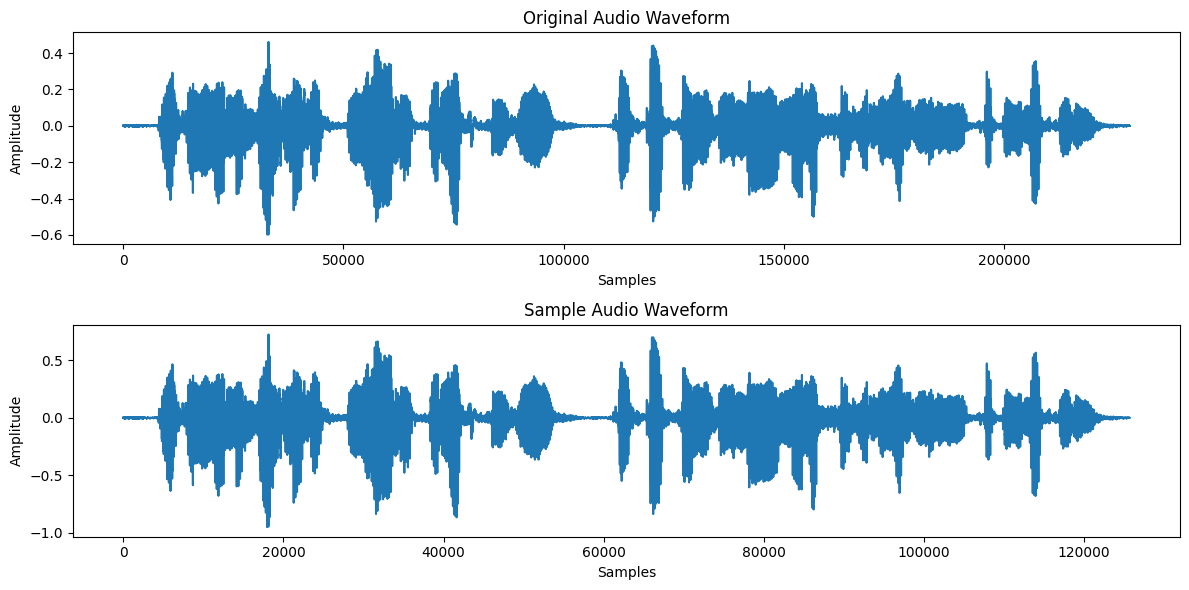

In [ ]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio

# Define input and output directories
# input_audio_dir_train = Path('/content/train_data')  # Directory with raw audio data
# output_audio_dir_train = Path('/content/audio_processing/audio_preprocessed_train')  # Directory for preprocessed audio

# Load the original and sample audio files
audio_file = "ch_02_arabic_tts_dataset_164.wav"
original_file_path = str(input_audio_dir_train / audio_file)  # Convert Path to string
sample_file_path = str(output_audio_dir_train / audio_file.replace(".wav", ".flac"))  # Convert Path to string

# Load audio files
original_audio, original_sr = librosa.load(original_file_path, sr=None)
sample_audio, sample_sr = librosa.load(sample_file_path, sr=None)

# original_sr, original_audio = wavfile.read(original_file_path)
# sample_sr, sample_audio = wavfile.read(sample_file_path)

# Play the original audio
print("Playing original audio:")
display(Audio(original_audio, rate=original_sr))
#
# Play the sample audio
print("Playing sample audio:")
display(Audio(sample_file_path))

# Optional: Visualize the waveforms
plt.figure(figsize=(12, 6))

# Original Audio Waveform
plt.subplot(2, 1, 1)
plt.title("Original Audio Waveform")
plt.plot(original_audio)
plt.xlabel("Samples")
plt.ylabel("Amplitude")

# Sample Audio Waveform
plt.subplot(2, 1, 2)
plt.title("Sample Audio Waveform")
plt.plot(sample_audio)
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Making the file_path generic

In [ ]:
import json

def modify_json_file(file_path, output_path, old_path, new_path):
    # Load the JSON data from the file
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            # Parse each line as a JSON object
            try:
                entry = json.loads(line.strip())  # Use strip to remove any extra whitespace/newlines
                data.append(entry)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")

    # Modify the file paths
    for entry in data:
        # Update the file path to the new directory
        entry['audio_filepath'] = entry['audio_filepath'].replace(old_path, new_path)

    # Save the modified data back to a JSON file
    with open(output_path, 'w', encoding='utf-8') as f:
        for item in data:
            json.dump(item, f, ensure_ascii=False)  # Use ensure_ascii=False to maintain Arabic characters
            f.write('\n')  # Write each JSON object on a new line

    print(f"File paths updated successfully for {output_path}!")

# Define paths for training and validation datasets
train_file_path = '/content/audio_data/audio_preprocessed_val/val_data_preprocessed.json'  # Path for training dataset
val_file_path = '/content/audio_data/audio_preprocessed_train/train_data_preprocessed.json'      # Path for validation dataset
train_output_path = train_file_path            # Output path for modified training dataset
val_output_path = val_file_path                # Output path for modified validation dataset
old_audio_path = '/content/audio_data'                     # Current path in the JSON
new_audio_path = 'DATASET_PATH'                            # New path to replace with

# Modify JSON for training and validation
modify_json_file(train_file_path, train_output_path, old_audio_path, new_audio_path)
modify_json_file(val_file_path, val_output_path, old_audio_path, new_audio_path)


File paths updated successfully for /content/audio_data/audio_preprocessed_val/val_data_preprocessed.json!
File paths updated successfully for /content/audio_data/audio_preprocessed_train/train_data_preprocessed.json!
